In [23]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [24]:
#training data from https://github.com/IdleHandsProject/makennbot
x_train = [
  [ 0.0, 0.0, 0.0, 0.0, 0.0],
  [ 1.0, 1.0, 1.0, 1.0, 1.0],
  [ 0.0, 0.0, 1.0, 0.0, 0.0],
  [ 0.0, 1.0, 1.0, 1.0, 0.0],
  #[ 0.0, 1.0, 1.0, 0.0, 0.0],      #' 1 Detect ON FL, F
  #[ 0.0, 1.0, 0.0, 0.0, 0.0],      # ' 2 Detect ON FL
  #[ 1.0, 1.0, 1.0, 0.0, 0.0],      # ' 3 Detect ON F, FL, L
  #[ 1.0, 1.0, 0.0, 0.0, 0.0],      # ' 4 Detect ON L and FL
  #[ 0.0, 0.0, 1.0, 0.0, 0.0],      # ' Detect ON F
  #[ 1.0, 0.0, 0.0, 0.0, 0.0],      # ' 6 Detect ON L
  #[ 0.0, 0.0, 0.0, 0.0, 0.0],      # ' NO Detect
  #[ 0.0, 0.0, 0.0, 1.0, 0.0],      # ' 8 Detect ON FR
  #[ 0.0, 1.0, 0.0, 1.0, 0.0],      # ' Detect ON FL, FR
  #[ 0.0, 0.0, 1.0, 1.0, 0.0],      #' 10 Detect ON F, FR
  #[ 0.0, 1.0, 1.0, 1.0, 0.0],      # ' Detect ON FL, F, FR
  #[ 1.0, 0.0, 0.0, 1.0, 0.0],      # ' 12 Detect ON L, F
  #[ 1.0, 1.0, 0.0, 1.0, 0.0],      # ' Detect ON L, FL, FR
  #[ 1.0, 0.0, 1.0, 1.0, 0.0],      # ' 14 Detect ON L, F, FR
  #[ 1.0, 0.0, 1.0, 0.0, 0.0],      # ' Detect ON L, F
  #[ 1.0, 1.0, 1.0, 1.0, 0.0],      # ' 16 Detect ON L, FL, F, FR
  #[ 0.0, 1.0, 1.0, 0.0, 1.0],      # ' Detect ON FL, F, R
  #[ 0.0, 1.0, 0.0, 0.0, 1.0],      # ' 18 Detect ON FL, R
  #[ 1.0, 1.0, 1.0, 0.0, 1.0],      # ' Detect ON F, FL, L, R
  #[ 1.0, 1.0, 0.0, 0.0, 1.0],      # ' 20 Detect ON L and FL, R
  #[ 0.0, 0.0, 1.0, 0.0, 1.0],      # ' Detect ON F, R
  #[ 1.0, 0.0, 0.0, 0.0, 1.0],      # ' 22 Detect ON L, R
  #[ 0.0, 0.0, 0.0, 0.0, 1.0],      # ' R
  #[ 0.0, 0.0, 0.0, 1.0, 1.0],      # ' 24 Detect ON FR, R
  #[ 0.0, 1.0, 0.0, 1.0, 1.0],      # ' Detect ON FL, FR, R
  #[ 0.0, 0.0, 1.0, 1.0, 1.0],      # ' 26 Detect ON F, FR, R
  #[ 0.0, 1.0, 1.0, 1.0, 1.0],      # ' Detect ON FL, F, FR, R
  #[ 1.0, 0.0, 0.0, 1.0, 1.0],      # ' 28 Detect ON L, F, R
  #[ 1.0, 1.0, 0.0, 1.0, 1.0],      # ' Detect ON L, FL, FR, R
  #[ 1.0, 0.0, 1.0, 1.0, 1.0],      # ' 30 Detect ON L, F, FR, R
  #[ 1.0, 0.0, 1.0, 0.0, 1.0],      # ' Detect ON L, F, R
  #[ 1.0, 1.0, 1.0, 1.0, 1.0],      # ' 32 Detect ON L, FL, F, FR, R
]
y_train = [
  [ 1.0, 1.0],
  [ 0.0, 0.0],
  [ 0.5, 0.5],
  [ 0.8, 0.2],
  #[ 0.65, 0.55],       #' 1 LEFT MOTOR faster
  #[ 0.75, 0.5],        #' 2 LEFT MOTOR FASTER!
  #[ 1.0,  0.5],        #' BOTH MOTORS FULL BACKWARDS
  #[ 0.7,  0.7],        #' 4 MOTOR both forwards
  #[ 0.5,  0.75],       #' MOTOR LEFT STOPPED, RIGHT FORWARDS
  #[ 0.7,  0.7],        #' 6 BOTH fowards
  #[ 0.75,  0.75],      #' BOTH forwards
  #[ 0.7, 0.7],         #' 8 
  #[ 0.6,  0.6],
  #[ 0.55,  0.65],      #' 10
  #[ 0.2,  0.2],
  #[ 0.55,  0.65],      #' 12
  #[ 0.6,  0.6],
  #[ 0.3,  0.3],        #' 14
  #[ 0.65, 0.55],
  #[ 0.2,  0.2],        #' 16
  #[ 0.2, 0.2],       #' LEFT MOTOR SLOW
  #[ 0.55, 0.55],       # ' 18 LEFT MOTOR FASTER
  #[ 0.2,  0.2],        #' BOTH MOTORS FULL BACKWARDS
  #[ 0.55,  0.55],      #  ' 20 MOTOR LEFT FULL FORWARD, RIGHT BACKWARDS
  #[ 0.5,  0.75],       #' MOTOR LEFT STOPPED, RIGHT FORWARDS
  #[ 0.7,  0.7],        #' 22 BOTH BACKWARDS
  #[ 0.7,  0.7],        #' BOTH MOTORS STOPPED
  #[ 0.55, 0.55],       #' 24
  #[ 0.55,  0.55],
  #[ 0.5, 0.7],         #' 26
  #[ 0.2,  0.2],
  #[ 0.6,  0.6],        #' 28
  #[ 0.55,  0.55],
  #[ 0.2, 0.2],        #' 30
  #[ 0.2,  0.2],
  #[ 0.2, 0.2],       #' 32
]

x_train = np.array(x_train)
y_train = np.array(y_train)

In [25]:
# training data from http://robotics.hobbizine.com/arduinoann.html
#x_train = [
#  [ 1, 1, 1, 1, 1, 1, 0 ],  # 0
#  [ 0, 1, 1, 0, 0, 0, 0 ],  # 1
#  [ 1, 1, 0, 1, 1, 0, 1 ],  # 2
#  [ 1, 1, 1, 1, 0, 0, 1 ],  # 3
#  [ 0, 1, 1, 0, 0, 1, 1 ],  # 4
#  [ 1, 0, 1, 1, 0, 1, 1 ],  # 5
#  [ 0, 0, 1, 1, 1, 1, 1 ],  # 6
#  [ 1, 1, 1, 0, 0, 0, 0 ],  # 7 
#  [ 1, 1, 1, 1, 1, 1, 1 ],  # 8
#  [ 1, 1, 1, 0, 0, 1, 1 ]   # 9
#]

#y_train = [
#  [ 0, 0, 0, 0 ],  
#  [ 0, 0, 0, 1 ], 
#  [ 0, 0, 1, 0 ], 
#  [ 0, 0, 1, 1 ], 
#  [ 0, 1, 0, 0 ], 
#  [ 0, 1, 0, 1 ], 
#  [ 0, 1, 1, 0 ], 
#  [ 0, 1, 1, 1 ], 
#  [ 1, 0, 0, 0 ], 
#  [ 1, 0, 0, 1 ] 
#]

#x_train = np.array(x_train, dtype=np.float32)
#y_train = np.array(y_train)

In [26]:
model = Sequential()

IN = x_train.shape[1]
HIDDEN = IN + 1
OUT = y_train.shape[1]

model.add(Dense(units=HIDDEN, activation='sigmoid', input_dim=IN, dtype='float16'))
model.add(Dense(units=OUT, activation='sigmoid', dtype='float16'))

model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(learning_rate=0.4))

In [27]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

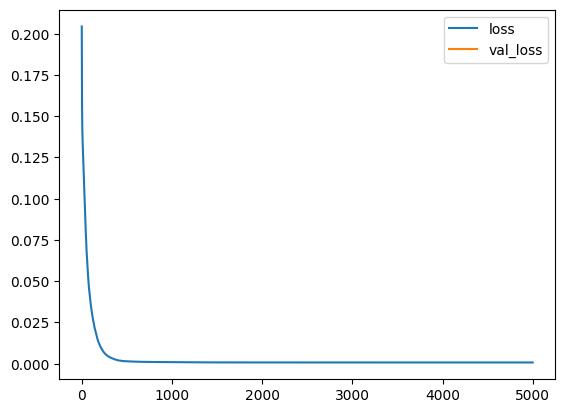

In [28]:
model.fit(x_train, y_train, epochs=5000, batch_size=1, verbose=False, callbacks=[plot_losses])

In [29]:
preds = model.predict(x_train).tolist()
for i, pred in enumerate(preds):
    print('model:\t', np.round(pred,2))
    print('label:\t', y_train[i])
    print(' ')

1/1 [==============================] - 0s 87ms/step
model:	 [0.97 0.96]
label:	 [1. 1.]
 
model:	 [0.05 0.03]
label:	 [0. 0.]
 
model:	 [0.51 0.49]
label:	 [0.5 0.5]
 
model:	 [0.79 0.21]
label:	 [0.8 0.2]
 


In [30]:
def to_str(name, W):
    s = str(W.tolist()).replace('[', '').replace(']', '\n').replace(',', '\nlong ')
    return 'f'+name+'\nlong ' + s + 'fEnd'+name

In [31]:
# output weights as strings you can copy into arduino sketch
W1 = np.vstack((K.eval(model.weights[0]), K.eval(model.weights[1])))
W2 = np.vstack((K.eval(model.weights[2]), K.eval(model.weights[3])))

print('// replace these two lines in spin2 code:')
print('// float HiddenWeights[InputNodes+1][HiddenNodes]')
print('// float OutputWeights[HiddenNodes+1][OutputNodes]')
print('// With trained weights below.')
print('\n')
print(to_str('HiddenWeights', W1))
print(to_str('OutputWeights', W2))

// replace these two lines in spin2 code:
// float HiddenWeights[InputNodes+1][HiddenNodes]
// float OutputWeights[HiddenNodes+1][OutputNodes]
// With trained weights below.


fHiddenWeights
long -1.103515625
long  1.7958984375
long  -0.6025390625
long  -0.60107421875
long  -0.11968994140625
long  0.292724609375

long  1.38671875
long  -0.70654296875
long  -0.9033203125
long  -0.658203125
long  -0.6201171875
long  1.0

long  -1.443359375
long  0.99951171875
long  -1.1328125
long  -1.501953125
long  0.130615234375
long  1.9443359375

long  0.294189453125
long  -0.60791015625
long  -0.966796875
long  0.413330078125
long  -0.53564453125
long  0.72412109375

long  -1.533203125
long  1.408203125
long  -0.38818359375
long  -1.5078125
long  -0.2301025390625
long  0.336669921875

long  0.87841796875
long  -0.7119140625
long  1.0
long  1.244140625
long  0.250244140625
long  -1.3203125

fEndHiddenWeights
fOutputWeights
long 2.994140625
long  0.9716796875

long  -2.984375
long  -0.83056640625

lo